
# Arrest Rate 

Arrests will be treated as a negative for our point system. The idea here is that the more arrests in a given area, the more likely an individual is to be caught for capital crime when committing it. So, the more arrests an area has, the lower the ranking it will have. 

In [65]:
import pandas as pd # import pandas library

arrest = pd.read_csv("balls.csv", sep=",") # read csv file into pandas dataframe

arrest.head() # show first five rows of dataframe

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [66]:
# create a dictionary to store the number of arrests in each neighborhood
arrestLocation = {}
# get the location of each arrest
arrestLoc = arrest['INCIDENTNEIGHBORHOOD']
#remove the NaN values
arrestLoc = arrestLoc.dropna()

# loop through each arrest location
for arr in arrestLoc:
    # if the neighborhood is already in the dictionary, add 1 to the count
    if arr in arrestLocation:
        arrestLocation[arr] = arrestLocation[arr]+1
    # otherwise, set the count to 1
    else:
        arrestLocation[arr] = 1


In [67]:
ArrestLocationData = pd.DataFrame.from_dict(arrestLocation, orient = 'index', columns = ['Number of Arrests'])
ArrestLocationData["Neighborhoods"] = ArrestLocationData.index
ArrestLocationData["Neighborhoods"] = ArrestLocationData["Neighborhoods"].str.lower()
# sort the dataframe by the number of arrests

In [68]:
ArrestLocationData = ArrestLocationData.sort_values(by = "Number of Arrests", ascending = False)
# show the top 10 neighborhoods with the most arrests

In [69]:
ArrestLocationData["points"] = ArrestLocationData["Number of Arrests"]*.1

ArrestLocationData.head(10)


,Number of Arrests,Neighborhoods,points
Central Business District,3785,central business district,378.5
South Side Flats,3186,south side flats,318.6
Carrick,2199,carrick,219.9
East Allegheny,2014,east allegheny,201.4
Homewood South,1941,homewood south,194.1
Homewood North,1837,homewood north,183.7
East Liberty,1733,east liberty,173.3
Marshall-Shadeland,1406,marshall-shadeland,140.6
Bluff,1371,bluff,137.1
Mount Washington,1356,mount washington,135.6


<Axes: title={'center': 'Top 10 Neighborhoods with the Most Arrests'}, xlabel='Neighborhoods'>

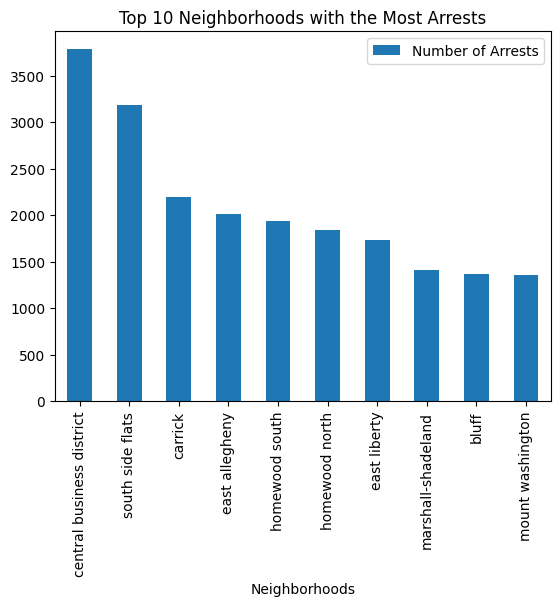

In [70]:
#make a bar chart of the top 10 neighborhoods with the most arrests
ArrestLocationData.head(10).plot.bar(x = "Neighborhoods", y = "Number of Arrests", title = "Top 10 Neighborhoods with the Most Arrests")

# Conclusion

Central business district is the top for most number of arrests. The point data (which is inversely correlated to the number of arrests) will be added to the final tally to create the list of best places to commit capital crime.